# Machine Learning
## LAB 4 - Logistic regression

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Exercise 1
#### Fit the sigmoid curve and calculate decision boundary using given dataset.

In [2]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

In [3]:
max_iter  = 10000
eps       = 0.00001
prev_cost = 99

### Optimization loop:
##### 1. **Calculate hypothesis for each datapoint x in X**: h = 1 / (1 + exp(-theta0-theta1*x))
##### 2. **Calculate crossentropy**: -y*log(h) - (1-y)*log(1-h)
##### 3. **Calculate cost**: sum(crossentropy) / len(x)
##### 4. **Calculate derivatives for theta 0 and theta1 (similar to those in linear regression)**: theta0_deriv = sum(h - y) / len(y); theta1_deriv = sum((h-y)*X)
##### 5. **Update theta weights**: theta = theta - lr*theta_deriv
##### 6. Check if cost is getting lower through iterations. If not, try to modify the learning rate

In [4]:
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta[0] - theta[1]*X))

    crossentropy = -y*np.log(h_x + 0.00001) - (1-y)*np.log(1-h_x + 0.00001)
    cost         = sum(crossentropy) / len(y)

    theta0_deriv = sum(h_x-y)/len(y)
    theta1_deriv = sum((h_x-y) * X) / len(y)

    alpha        = 0.1

    theta[0]     = theta[0] - alpha*theta0_deriv
    theta[1]     = theta[1] - alpha*theta1_deriv

    print("epoch ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost    = cost

epoch  1 , cost  0.6931271553039551
epoch  2 , cost  0.659021246670322
epoch  3 , cost  0.6039771302179857
epoch  4 , cost  0.5991105403412472
epoch  5 , cost  0.5950799259272489
epoch  6 , cost  0.5911668166518211
epoch  7 , cost  0.58732363039797
epoch  8 , cost  0.5835427499630235
epoch  9 , cost  0.579822295091369
epoch  10 , cost  0.5761610249226744
epoch  11 , cost  0.5725576843727719
epoch  12 , cost  0.5690111788836393
epoch  13 , cost  0.5655202323740179
epoch  14 , cost  0.5620837448672815
epoch  15 , cost  0.5587006109681997
epoch  16 , cost  0.5553697689690373
epoch  17 , cost  0.5520901514047926
epoch  18 , cost  0.5488606254485521
epoch  19 , cost  0.5456802052530375
epoch  20 , cost  0.5425479191948067
epoch  21 , cost  0.539462788877162
epoch  22 , cost  0.5364237735894594
epoch  23 , cost  0.5334300463172522
epoch  24 , cost  0.5304805920882658
epoch  25 , cost  0.527574491433122
epoch  26 , cost  0.5247109434144064
epoch  27 , cost  0.521889025514776
epoch  28 , cost 

In [5]:
print(theta)

[-9.830578   1.5369736]


In [6]:
x_samples = np.linspace(min(X), max(X), 100)
y_samples = 1 / (1 + np.exp(-theta[0] - theta[1]*x_samples))

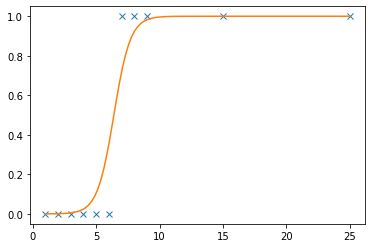

In [7]:
plt.plot(X, y, 'x')
plt.plot(x_samples, y_samples, '-')
plt.show()

# Exercise 2
#### Generalize optimization code for X being a matrix, where its rows are features and columns are examples. Code should work independently from number of features and number of examples. Use matrix multiplication (np.matmul or @).

In [8]:
X = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1], # bias' 'variables' already appended to X
              [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

In [9]:
y.shape = [1, len(y)]
theta   = np.zeros((X.shape[0], 1))

In [10]:
max_iter  = 10000
eps       = 0.00001
alpha     = 0.05
prev_cost = 99

In [11]:
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))

    crossentropy       = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost]             = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_derivs       = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta              = theta - alpha*theta_derivs

    print("epoch ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost          = cost

epoch  1 , cost  0.6931271807599427
epoch  2 , cost  0.4907838176392357
epoch  3 , cost  0.4116890669974017
epoch  4 , cost  0.3684038660255903
epoch  5 , cost  0.33997069538799857
epoch  6 , cost  0.3195094354441678
epoch  7 , cost  0.3038822737167386
epoch  8 , cost  0.2914393849331434
epoch  9 , cost  0.2812229550971979
epoch  10 , cost  0.27263476972591333
epoch  11 , cost  0.26527972278807516
epoch  12 , cost  0.25888509465888165
epoch  13 , cost  0.25325581430323585
epoch  14 , cost  0.24824818991869713
epoch  15 , cost  0.24375373437960401
epoch  16 , cost  0.2396888034241406
epoch  17 , cost  0.23598773063432435
epoch  18 , cost  0.2325981459066331
epoch  19 , cost  0.22947770189385588
epoch  20 , cost  0.2265917341270144
epoch  21 , cost  0.22391155572701482
epoch  22 , cost  0.221413192935355
epoch  23 , cost  0.21907643287864664
epoch  24 , cost  0.21688409638829562
epoch  25 , cost  0.2148214756179108
epoch  26 , cost  0.21287589407532162
epoch  27 , cost  0.211036358781436

In [12]:
print(theta)

[[-2.37272547]
 [ 1.17270134]
 [-2.41199288]]


#### Plot decision boundary on a plot x2(x1)
##### Calculating decision boundary might look like this:
##### theta0 + theta1 * x1 + theta2 * x2 = 0
##### theta2 * x2 = -theta0 - theta1 * x1
##### x2 = -theta0/theta2 - theta1/theta2 * x1

In [13]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

In [14]:
X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

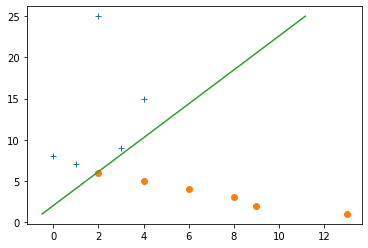

In [15]:
plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '-')
plt.show()

# Exercise 3
#### Using real data, optimize classifier to predict given values. Split dataset into a training set and a test set. Train model on the training set. Calculate TP, FP, TN, FN on test set. Calculate sensitivity, specificity, positive predictivity and negative predictivity.

In [16]:
data = pd.read_csv('./Lab4_data.txt')
data = data.values

##### We want X to be n+1 by m (n - number of features, m - number of examples). Data is 99x3, 99 - examples, first two columns - features, last column - labels. Create X of size 3x99:

In [17]:
X = np.ones((data.shape[1], data.shape[0]))

##### Fill X's second and third row with features, leave first row with ones

In [18]:
X[1:3, :] = data[:, 0:2].T

##### We want y to be 1 by m. Copy third column to y as row

In [19]:
y = data[:, 2:3].T

##### Normalization of the dataset in order to converge faster

In [20]:
X[1, :] = (X[1, :] - np.std(X[1, :])) / np.mean(X[1, :])
X[2, :] = (X[2, :] - np.std(X[2, :])) / np.mean(X[2, :])

In [21]:
theta = np.zeros((X.shape[0], 1))

In [22]:
max_iter  = 10000
eps       = 0.00001
alpha     = 0.05
prev_cost = 99

In [23]:
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))

    crossentropy       = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost]             = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_derivs       = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta              = theta - alpha*theta_derivs

    print("epoch ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost          = cost

epoch  1 , cost  0.6931271807599428
epoch  2 , cost  0.6902868848764901
epoch  3 , cost  0.6875783000891846
epoch  4 , cost  0.6849947158650966
epoch  5 , cost  0.6825297492292076
epoch  6 , cost  0.680177331527462
epoch  7 , cost  0.6779316953283688
epoch  8 , cost  0.6757873615235649
epoch  9 , cost  0.6737391266775609
epoch  10 , cost  0.6717820506677858
epoch  11 , cost  0.6699114446479542
epoch  12 , cost  0.668122859360651
epoch  13 , cost  0.6664120738187557
epoch  14 , cost  0.664775084369865
epoch  15 , cost  0.663208094153129
epoch  16 , cost  0.6617075029538386
epoch  17 , cost  0.6602698974576038
epoch  18 , cost  0.6588920419030097
epoch  19 , cost  0.6575708691291335
epoch  20 , cost  0.6563034720122491
epoch  21 , cost  0.6550870952843293
epoch  22 , cost  0.6539191277245837
epoch  23 , cost  0.6527970947141709
epoch  24 , cost  0.6517186511433755
epoch  25 , cost  0.6506815746599041
epoch  26 , cost  0.6496837592464996
epoch  27 , cost  0.6487232091157831
epoch  28 , co

In [24]:
print(theta)

[[-6.62800034]
 [ 5.366854  ]
 [ 5.09441908]]


In [25]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

In [26]:
X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

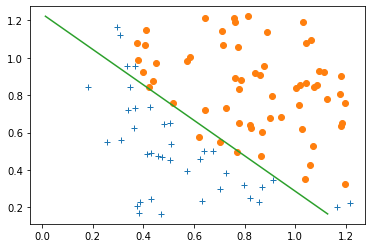

In [27]:
plt.plot(X_negative[2, :], X_negative[1, :], '+')
plt.plot(X_positive[2, :], X_positive[1, :], 'o')
plt.plot(x2, x1, '-')
plt.show()